In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Walmart.csv")

In [ ]:
# print the first 5 rows of the dataset
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
#checking for missing values
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
# statistical Analysis
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
# printing of the column names
x = df.columns
for i in x:
  print(i)

Store
Weekly_Sales
Holiday_Flag
Temperature
Fuel_Price
CPI
Unemployment


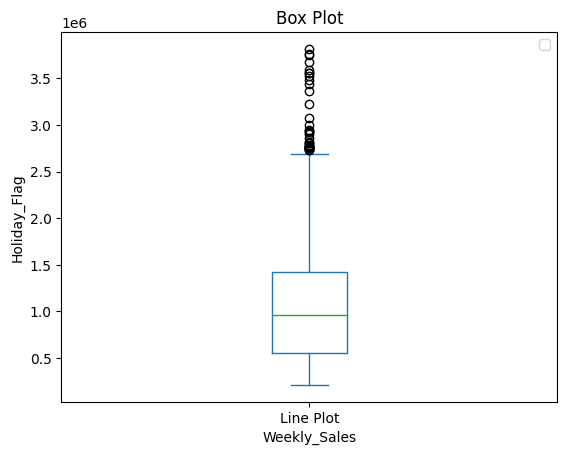

In [ ]:

# Plotting the boxplot using Pandas plot function
df.plot(x='Holiday_Flag', y='Weekly_Sales', kind='box', label='Line Plot')

# Adding labels and title
plt.xlabel('Weekly_Sales')
plt.ylabel('Holiday_Flag')
plt.title('Box Plot')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

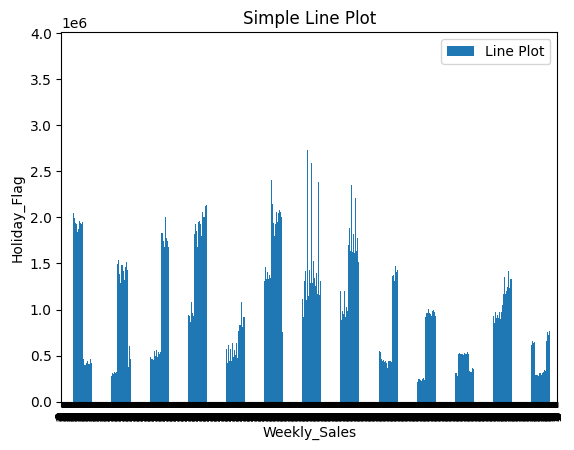

In [ ]:
# Plotting the boxplot using Pandas plot function
df.plot(x='Holiday_Flag', y='Weekly_Sales', kind='bar', label='Line Plot')

# Adding labels and title
plt.xlabel('Weekly_Sales')
plt.ylabel('Holiday_Flag')
plt.title('Simple Line Plot')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

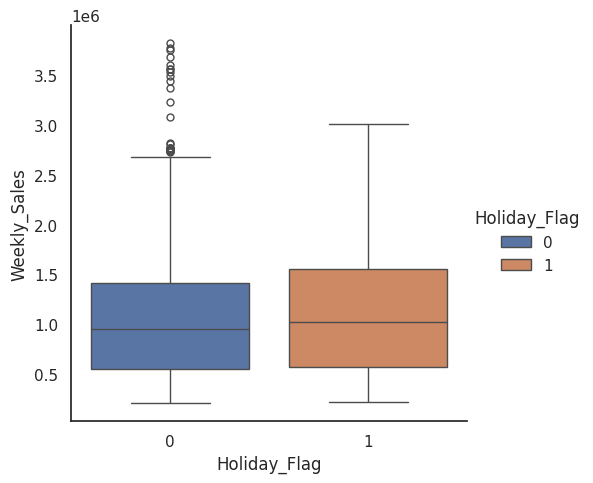

In [ ]:
sns.catplot(data=df, x="Holiday_Flag", y="Weekly_Sales", hue="Holiday_Flag", kind="box")

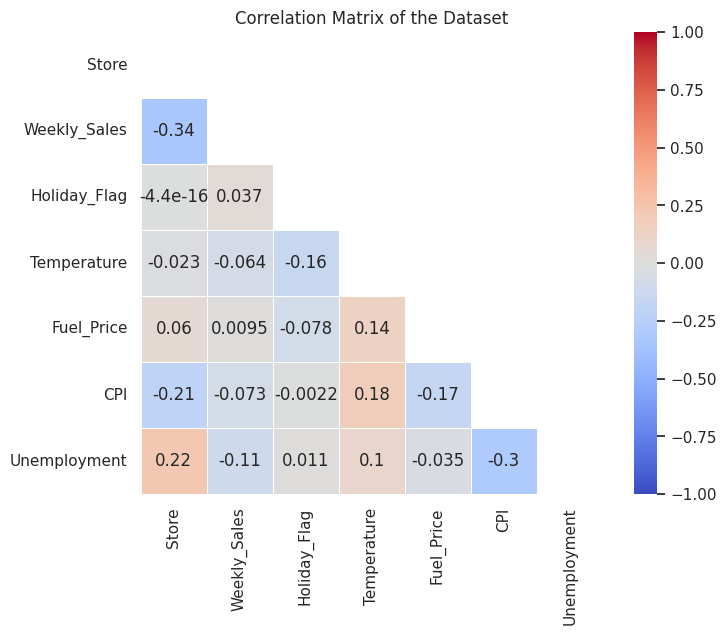

In [ ]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix using Seaborn
sns.set(style="white")  # Optional: Set the background style

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 6))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, mask=mask,cmap="coolwarm", vmax=1, vmin=-1, annot=True, linewidths=.5, square=True)

# Adding a title
plt.title('Correlation Matrix of the Dataset')

# Display the plot
plt.show()

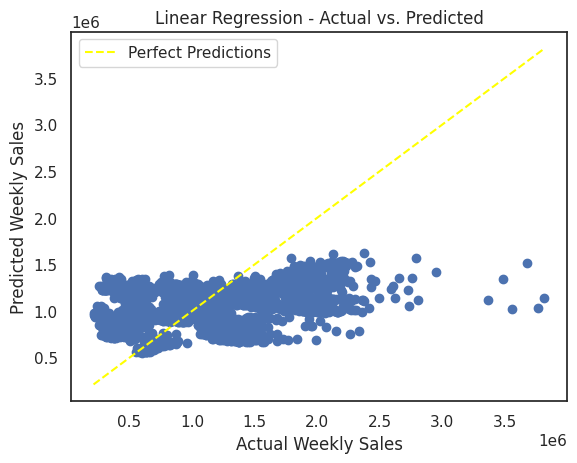

Coefficients (m): [-15105.44690886  92861.1407652    -461.1126132  -15306.91302536
  -2416.76842221 -28657.50344223]
Intercept (b): 2107499.2920529554


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming df contains the features (independent variables) and the target variable (dependent variable)
# For example, let's consider 'X' as the feature and 'y' as the target variable

# Sample data
X = df.drop('Weekly_Sales', axis=1)  # Drop the target variable from features
y = df['Weekly_Sales']

# Split the data into training and testing sets (80% training, 20% testing in this example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Plot the actual vs. predicted values for the testing set
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='yellow', label='Perfect Predictions')
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Linear Regression - Actual vs. Predicted')
plt.legend()
plt.show()

# Print the coefficients
print('Coefficients (m):', model.coef_)
print('Intercept (b):', model.intercept_)




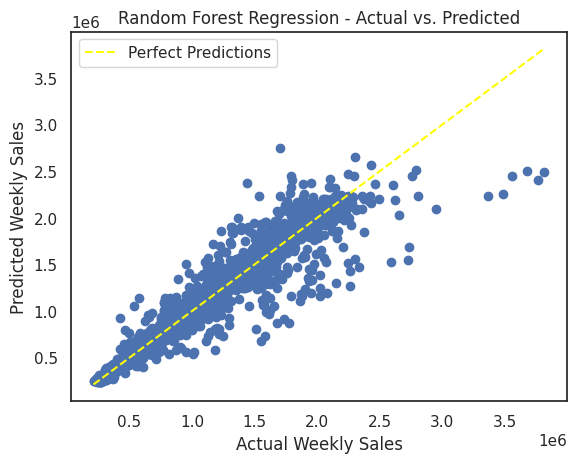

Mean Absolute Error (MAE): 81723.19013977627
Mean Squared Error (MSE): 23254048703.831387
R-squared (R2): 0.9251998979658057


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sample data
X = df.drop('Weekly_Sales', axis=1)  # Drop the target variable from features
y = df['Weekly_Sales']

# Split the data into training and testing sets (80% training, 20% testing in this example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Plot the actual vs. predicted values for the testing set
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='yellow', label='Perfect Predictions')
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Random Forest Regression - Actual vs. Predicted')
plt.legend()
plt.show()

# Calculate and print evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2):', r2)
